# Machine Learning Master Notes 19 - Logistic Softmax and Loss Function

### Prepare Environment

In [1]:
%matplotlib inline


# Essential libraries
import numpy as np
import pandas as pd
import math
import scipy
import random
import datetime
from datetime import datetime

# Graphical Component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm


## SciKit Learning Preprocessing  
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Pipeline and Train Test Split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## SciKit Learn ML Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Multiclass
from sklearn import multiclass
from sklearn.multiclass import OneVsRestClassifier

## SciKit Learn Dataset
import sklearn.datasets as skdata
from sklearn.datasets import make_blobs, make_classification, make_circles, make_gaussian_quantiles

## Pytorch
import torch

## Tensorflow
import tensorflow as tf

# The following file contain the finalized gradient descent, cost function program 
import MyRegressionProgramV2 as my
import testFile as test


2024-10-30 11:36:32.478193: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Preparation of Simple Multi-Class Classification Data

### Example 1: 3 Class Custom Data

In [2]:
X1 = np.array([[1, 3], [2,4], [8, 9], [3,4],[7, 8.5], [6.8, 7.5], [2,5],[1.5, 2.5],[6,3],[7,4],[6,5], [6,8], [8,3],[5,4],[9,8]])
y1 = np.array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [3]:
X1_c0 = X1[y1 == 0]
X1_c1 = X1[y1 == 1]
X1_c2 = X1[y1 == 2]

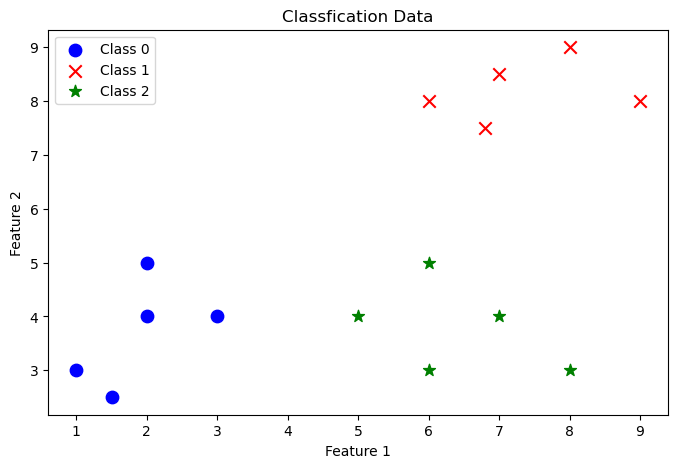

In [4]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X1_c0[:,0], X1_c0[:,1], marker='o', s = 80, c='b', label="Class 0")
ax1.scatter(X1_c1[:,0], X1_c1[:,1], marker='x', s = 80, c='r', label="Class 1")
ax1.scatter(X1_c2[:,0], X1_c2[:,1], marker='*', s = 80, c='g', label="Class 2")
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend(loc="upper left")
plt.show()

### Example 2: 3 Class Basic Example

In [5]:
X2, y2 = make_classification(n_samples=30, n_features = 2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, 
                             n_clusters_per_class = 1, random_state=15)

In [6]:
X2

array([[ 0.27912991, -1.44037331],
       [ 1.09078803,  2.87039611],
       [-0.1421124 , -1.92345206],
       [ 0.52621628,  0.19413389],
       [ 1.23776235, -0.80607812],
       [ 0.92997061,  2.2107433 ],
       [ 0.92163467, -0.99339502],
       [-1.25848203,  2.69425705],
       [-1.16747321,  1.02481538],
       [ 0.34863806,  0.15637629],
       [-0.91380625,  0.89020462],
       [-1.02732663,  1.31426767],
       [-0.79246704,  0.71060574],
       [ 1.23144309,  2.18451769],
       [-1.34277644,  2.39459039],
       [-0.89802635,  1.12900034],
       [ 1.60262439,  2.18545311],
       [-0.28457476, -2.03758725],
       [ 1.77926414, -0.46952691],
       [ 2.02633732,  2.02052107],
       [ 1.31489592, -0.27941799],
       [-1.14698508, -0.14463301],
       [ 1.13865231,  2.18013876],
       [ 0.56927256, -1.30431595],
       [ 1.35870645, -0.79851399],
       [ 1.45015611, -0.59655324],
       [-0.84034771,  0.09035531],
       [-0.17669223,  1.82078771],
       [-0.93615324,

In [7]:
y2

array([2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       1, 2, 2, 2, 0, 1, 0, 2])

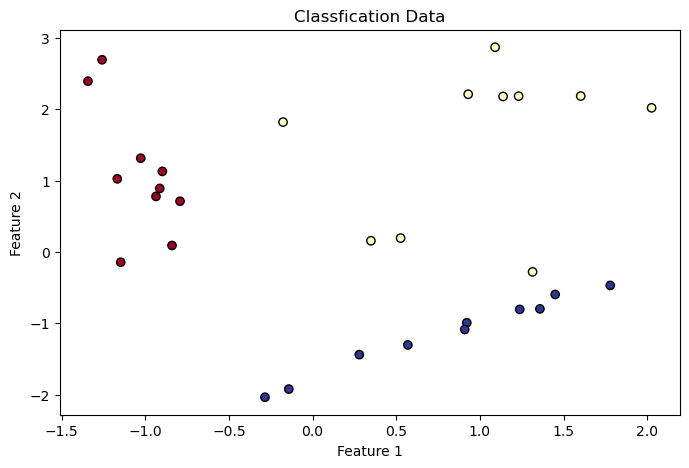

In [8]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2[:, 0], X2[:, 1], c=y2, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.show()

### Example 3 : 4 Class

In [13]:
X3, y3 = make_classification(n_samples=50, n_features = 2, n_informative = 2, n_redundant=0, n_repeated=0, 
                             n_classes=4, n_clusters_per_class = 1, random_state=33)

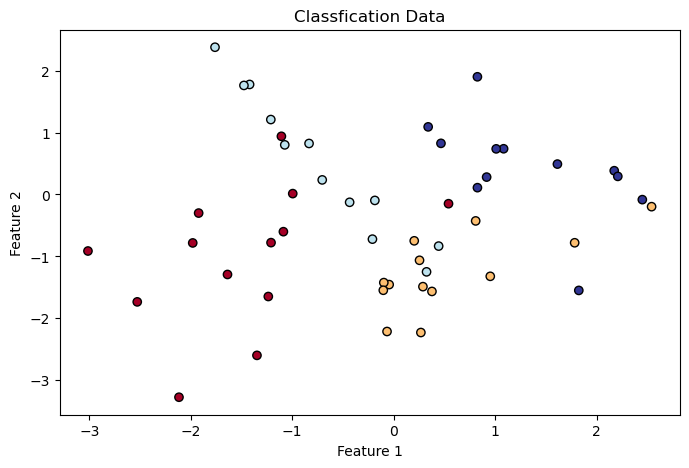

In [14]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3[:, 0], X3[:, 1], c=y3, edgecolors='k', cmap=plt.cm.RdYlBu)
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.show()

## Softmax Function

The formula for Softmax Function is as follows:
$$P(y=k|x)_i=\frac{e^{z_i}}{\sum\limits_{j=1}^{k}e^{z_j}}$$
Since:
$$z = f(x)$$
$$f(x) = Xw + b$$
Then:
$$P(y=k|x)=\frac{e^{f(x)_i}}{\sum\limits_{j=1}^{k}e^{f(x)_j}}$$
$$P(y=k|x)=\frac{e^{Xw_k+b_k}}{\sum\limits_{j=1}^{k}e^{Xw_j+b_j}}$$

## Intuition of Softmax Function

The purpose of the Softmax function is to compute the probability of each class against other classes. Thus we have the formula $\frac{\text{predictEachClass}}{\text{sumAllPredict}}$. Suppose, we have 3 classes and for each example, we have a set of 3 data that explains the relationship of the training example with the classes.
Let us suppose we have an example with the following score: $[5, 3, 2]$. Each score represents each class. Thus, the score of class 0 is 5 and so on. Each score is $z$

Using Softmax function:
$$P(y=k|x)_i=\frac{e^{z_i}}{\sum\limits_{j=1}^{k}e^{z_j}}$$

Where:
$$z = [5,3,2]$$

For the first score:
$$P(y=0|x)_i=\frac{e^{z_0}}{e^{z_0}+e^{z_1}+e^{z_2}}$$
$$P(y=0|x)_i=\frac{e^{5}}{e^{5}+e^{3}+e^{2}}$$

For the second score:
$$P(y=1|x)_i=\frac{e^{z_1}}{e^{z_0}+e^{z_1}+e^{z_2}}$$
$$P(y=1|x)_i=\frac{e^{3}}{e^{5}+e^{3}+e^{2}}$$

For the third score:
$$P(y=2|x)_i=\frac{e^{z_2}}{e^{z_0}+e^{z_1}+e^{z_2}}$$
$$P(y=2|x)_i=\frac{e^{2}}{e^{5}+e^{3}+e^{2}}$$

In [15]:
print(np.exp(5))
print(np.exp(3))
print(np.exp(2))

148.4131591025766
20.085536923187668
7.38905609893065


First score:
$$P(y=0|x)_i=\frac{e^{5}}{e^{5}+e^{3}+e^{2}}$$
$$P(y=0|x)_i=\frac{148.41}{148.41+20.89+7.39}$$

Second score:
$$P(y=0|x)_i=\frac{e^{3}}{e^{5}+e^{3}+e^{2}}$$
$$P(y=0|x)_i=\frac{20.89}{148.41+20.89+7.39}$$

Third score:
$$P(y=0|x)_i=\frac{e^{2}}{e^{5}+e^{3}+e^{2}}$$
$$P(y=0|x)_i=\frac{7.39}{148.41+20.89+7.39}$$

In [16]:
print(np.exp(5)/sum([np.exp(5), np.exp(3), np.exp(2)]))
print(np.exp(3)/sum([np.exp(5), np.exp(3), np.exp(2)]))
print(np.exp(2)/sum([np.exp(5), np.exp(3), np.exp(2)]))

0.8437947344813395
0.11419519938459449
0.042010066134066056


$$P(y=0|x)_i=\frac{148.41}{148.41+20.89+7.39} = 0.8438$$
$$P(y=1|x)_i=\frac{20.89}{148.41+20.89+7.39} = 0.1142$$
$$P(y=2|x)_i=\frac{7.39}{148.41+20.89+7.39} = 0.0420$$

The total probability of each classification add up to 1.

$$0.8438 + 0.1142 + 0.0420 = 1$$

For each training example, we should have the probability distribution for each class that could be added to 1. To fit a linear equation of 2 features and 3 classes, for each training example, we should compute $f(x) = z = (x_0 \cdot w_0) + (x_1 \cdot w_1) + b$ for each class. Therefore, we should have the following construct:

$$f(x^{(i)})_{z_0} = z_0^{(i)} = (x_0^{(i)} \cdot w_0^{(i)}) + (x_1^{(i)} \cdot w_1^{(i)}) + b^{(i)}$$
$$f(x^{(i)})_{z_1} = z_1^{(i)} = (x_0^{(i)} \cdot w_0^{(i)}) + (x_1^{(i)} \cdot w_1^{(i)}) + b^{(i)}$$
$$f(x^{(i)})_{z_2} = z_2^{(i)} = (x_0^{(i)} \cdot w_0^{(i)}) + (x_1^{(i)} \cdot w_1^{(i)}) + b^{(i)}$$
$$ $$
where $z_0$ belongs to the probability of class 1, $z_1$ belongs to probability of class 2 and $z_2$ belongs to probability of class 3.
$$ $$
Using matrix computation $f(x^{(i)})$ should return a dimension of 1 by `num_of_class` matrix for a single training example.

The result for each training example should be
$$\hat{y}^{(i)} = \begin{bmatrix} p_{z0}^{(i)} & p_{z1}^{(i)} & p_{z2}^{(i)} \end{bmatrix}$$

To compute $f(x)$ in matrix form, we have the following matrices:

$$X = \begin{bmatrix} x_0^{(0)} & x_1^{(0)} \\ x_0^{(1)} &  x_1^{(1)} \\ ... & ... \\ x_0^{(m)} &  x_1^{(m)} \end{bmatrix}$$

We need to construct the matrix of $W$ which is `number_of_features` by `number_of_class`.
$$W = \begin{bmatrix} w_{0,z0} & w_{0,z1} & w_{0,z2} \\ w_{1,z0} & w_{1,z1} & w_{1,z2} \end{bmatrix}$$
where the first index refers to the weights of feature and the second index should refer to each class.
$$$$
$b$ should also be a vector of 1 by `number_of_class`.
$$b = \begin{bmatrix} b_0 & b_1 & b_2 \end{bmatrix}$$
We have
$$f(x) = XW + b = z = \begin{bmatrix} z_0 & z_1 & z_2 \end{bmatrix} = \begin{bmatrix} z_0 & z_1 & z_2 \\ x_{0}w_{0} & x_{0}w_{0} & x_{0}w_{0} \\ + & + & + \\ x_{1}w_{1} & x_{1}w_{1} & x_{1}w_{1} \\ + & + & + \\ b_0 & b_1 & b_ 2\end{bmatrix}$$
This lead to the following result for single training example:
$$\hat{y}^{(i)} = \begin{bmatrix} p_{z0}^{(i)} & p_{z1}^{(i)} & p_{z2}^{(i)} \end{bmatrix}$$
Thus we have the following for multiple examples:
$$\hat{y} = \begin{bmatrix} p_{z0}^{(0)} & p_{z1}^{(0)} & p_{z2}^{(0)} \\ p_{z0}^{(1)} & p_{z1}^{(1)} & p_{z2}^{(1)} \\ ... & ... & ... \\ p_{z0}^{(m)} & p_{z1}^{(m)} & p_{z2}^{(m)} \end{bmatrix}$$

- https://www.geeksforgeeks.org/how-to-implement-softmax-and-cross-entropy-in-python-and-pytorch/
- https://community.deeplearning.ai/t/softmax-regression-constructing-custom-function/684236/14

## Implementation of Softmax Function

In [17]:
# Single training example with 3 classes
fx = np.array([5, 3. , 2. ])

In [18]:
numerator = np.exp(fx)
numerator

array([148.4131591 ,  20.08553692,   7.3890561 ])

In [19]:
demoninator = np.sum(numerator)
demoninator

175.8877521246949

In [20]:
numerator/demoninator

array([0.84379473, 0.1141952 , 0.04201007])

In [21]:
def mySoftmax(fx):
    '''
    This Softmax function use the formula np.exp(X)/np.sum(np.exp(X))
    For matrix this function only accepts columns as features.
    The Softmax will work on per data observation in rows

    INPUT:
    fx = fx should be in (m,n) or (m,) 

    OUTPUT:
    softmax (matrix) if there is more than one feature. All the columns in a specific row added up to 1.
    '''
    if fx.ndim == 1:
        # Taking care of input that is 1D array
        softmax = np.exp(fx)/np.sum(np.exp(fx))
    else:
        # Taking care of input that is 2D
        m,n = fx.shape
        if n == 1:
            # Taking care of input that is 2D but contain only one feature
            softmax = np.exp(fx)/np.sum(np.exp(fx), keepdims=True)
        else:
            # Taking care of input that is 2D with multiple columns
            softmax = np.exp(fx)/np.sum(np.exp(fx), axis=1, keepdims=True)
    return softmax

In [22]:
mySoftmax(fx)

array([0.84379473, 0.1141952 , 0.04201007])

#### Example 1

In [23]:
# One training example with 4 classes
fx1 = np.array([2, 4, 5, 3], dtype=float)

In [24]:
mySoftmax(fx1)

array([0.0320586 , 0.23688282, 0.64391426, 0.08714432])

**Expected Outcome: [0.0320586  0.23688282 0.64391426 0.08714432]**

In [25]:
np.sum(mySoftmax(fx1))

1.0

In [26]:
scipy.special.softmax(fx1)

array([0.0320586 , 0.23688282, 0.64391426, 0.08714432])

**Expected Outcome: [0.0320586  0.23688282 0.64391426 0.08714432]**

In [27]:
np.sum(scipy.special.softmax(fx1))

0.9999999999999999

In [28]:
torch.nn.functional.softmax(torch.Tensor(fx1), dim=0)

tensor([0.0321, 0.2369, 0.6439, 0.0871])

**Expected Outcome: [0.0320586  0.23688282 0.64391426 0.08714432]**

In [29]:
torch.sum(torch.nn.functional.softmax(torch.Tensor(fx1), dim=0))

tensor(1.0000)

In [30]:
tf.nn.softmax(fx1)

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.0320586 , 0.23688282, 0.64391426, 0.08714432])>

**Expected Outcome: [0.0320586  0.23688282 0.64391426 0.08714432]**

In [31]:
tf.math.reduce_sum(tf.nn.softmax(fx1))

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

#### Example 2

In [32]:
# 2 features and 3 examples
# y label has 3 class
X2 = np.array([[1, 3], [5,4], [8, 9]])
y2 = np.array([0, 1, 2]).reshape(-1,1)

In [33]:
# class 0: w_0 = 0.2, w_1 = 0.3, b = 0.1
# class 1: w_0 = 0.1, w_1 = 0.2, b = 0.3
# class 2: w_0 = 0.3, w_1 = 0.4, b = 0.5
W = np.array([[0.2, 0.1, 0.3],[0.3, 0.2, 0.4]])
b = np.array([[0.1,0.3,0.5]])

In [34]:
# Each training example should have 1 by 3 row vector, one prediction for each class
# 3 training example should return 3 by 3 matrix
fx2 = X2@W + b
fx2

array([[1.2, 1. , 2. ],
       [2.3, 1.6, 3.6],
       [4.4, 2.9, 6.5]])

In [35]:
mySoftmax(fx2)

array([[0.24726331, 0.20244208, 0.55029462],
       [0.19357779, 0.09612788, 0.71029433],
       [0.10650421, 0.0237643 , 0.86973149]])

In [36]:
np.sum(mySoftmax(fx2), axis = 1, keepdims=True)

array([[1.],
       [1.],
       [1.]])

In [37]:
scipy.special.softmax(fx2, axis = 1)

array([[0.24726331, 0.20244208, 0.55029462],
       [0.19357779, 0.09612788, 0.71029433],
       [0.10650421, 0.0237643 , 0.86973149]])

In [38]:
np.sum(scipy.special.softmax(fx2, axis=1), axis = 1, keepdims=True)

array([[1.],
       [1.],
       [1.]])

In [39]:
torch.nn.functional.softmax(torch.Tensor(fx2), dim=1)

tensor([[0.2473, 0.2024, 0.5503],
        [0.1936, 0.0961, 0.7103],
        [0.1065, 0.0238, 0.8697]])

In [40]:
torch.sum(torch.nn.functional.softmax(torch.Tensor(fx2), dim=1),axis = 1, keepdims=True)

tensor([[1.],
        [1.],
        [1.]])

In [41]:
tf.nn.softmax(fx2)

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[0.24726331, 0.20244208, 0.55029462],
       [0.19357779, 0.09612788, 0.71029433],
       [0.10650421, 0.0237643 , 0.86973149]])>

In [42]:
tf.math.reduce_sum(tf.nn.softmax(fx2),axis = 1, keepdims=True)

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[1.],
       [1.],
       [1.]])>

#### Example 3

In [43]:
# One example 3 classes
fx3 = np.array([2.0, 1.0, 0.1],dtype=float)

In [44]:
mySoftmax(fx3)

array([0.65900114, 0.24243297, 0.09856589])

In [45]:
np.sum(mySoftmax(fx3))

1.0

In [46]:
scipy.special.softmax(fx3)

array([0.65900114, 0.24243297, 0.09856589])

In [47]:
np.sum(scipy.special.softmax(fx3))

1.0

In [48]:
torch.nn.functional.softmax(torch.Tensor(fx3), dim=0)

tensor([0.6590, 0.2424, 0.0986])

In [49]:
torch.sum(torch.nn.functional.softmax(torch.Tensor(fx3), dim=0))

tensor(1.0000)

In [50]:
tf.nn.softmax(fx3)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.65900114, 0.24243297, 0.09856589])>

In [51]:
tf.math.reduce_sum(tf.nn.softmax(fx3))

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

#### Example 4

In [52]:
# One example 3 classes
fx4 = np.array([1, 2, 3], dtype=float).reshape(1,-1)

In [53]:
mySoftmax(fx4)

array([[0.09003057, 0.24472847, 0.66524096]])

In [54]:
np.sum(mySoftmax(fx4))

1.0

In [55]:
scipy.special.softmax(fx4)

array([[0.09003057, 0.24472847, 0.66524096]])

In [56]:
np.sum(scipy.special.softmax(fx4))

0.9999999999999999

In [57]:
torch.nn.functional.softmax(torch.Tensor(fx4), dim=1)

tensor([[0.0900, 0.2447, 0.6652]])

In [58]:
torch.sum(torch.nn.functional.softmax(torch.Tensor(fx4), dim=1))

tensor(1.)

In [59]:
tf.nn.softmax(fx4)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.09003057, 0.24472847, 0.66524096]])>

In [60]:
tf.math.reduce_sum(tf.nn.softmax(fx4))

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

#### Example 5

In [61]:
# 3 example with 3 class
fx5 = np.array([[2.0, 1.0, 0.1],[1.0, 3.0, 0.2],[0.2, 0.3, 1.5]], dtype=float)

In [62]:
fx5.shape

(3, 3)

In [63]:
mySoftmax(fx5)

array([[0.65900114, 0.24243297, 0.09856589],
       [0.11314284, 0.8360188 , 0.05083836],
       [0.17317614, 0.19138923, 0.63543463]])

In [64]:
np.sum(mySoftmax(fx5),axis=1,keepdims=True)

array([[1.],
       [1.],
       [1.]])

In [65]:
scipy.special.softmax(fx5, axis=1)

array([[0.65900114, 0.24243297, 0.09856589],
       [0.11314284, 0.8360188 , 0.05083836],
       [0.17317614, 0.19138923, 0.63543463]])

In [66]:
np.sum(scipy.special.softmax(fx5,axis=1), axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.]])

In [67]:
torch.nn.functional.softmax(torch.Tensor(fx5), dim=1)

tensor([[0.6590, 0.2424, 0.0986],
        [0.1131, 0.8360, 0.0508],
        [0.1732, 0.1914, 0.6354]])

In [68]:
torch.sum(torch.nn.functional.softmax(torch.Tensor(fx5), dim=1), axis=1, keepdims=True)

tensor([[1.0000],
        [1.0000],
        [1.0000]])

In [69]:
tf.nn.softmax(fx5)

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[0.65900114, 0.24243297, 0.09856589],
       [0.11314284, 0.8360188 , 0.05083836],
       [0.17317614, 0.19138923, 0.63543463]])>

In [70]:
tf.math.reduce_sum(tf.nn.softmax(fx5),axis=1, keepdims=True)

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[1.],
       [1.],
       [1.]])>

### Numerical Stability for Softmax Function

In [71]:
z1 = np.array([-999., -799, -710, -709, -100, -50, -10, -1, -0.5, 0, 0.5, 1, 10, 50, 100, 709, 710, 999, 9.9e+99]).astype(np.float64)
print(f"z = {z1}")
print(f"np.exp(z) = {np.exp(z1)}")

z = [-9.99e+02 -7.99e+02 -7.10e+02 -7.09e+02 -1.00e+02 -5.00e+01 -1.00e+01
 -1.00e+00 -5.00e-01  0.00e+00  5.00e-01  1.00e+00  1.00e+01  5.00e+01
  1.00e+02  7.09e+02  7.10e+02  9.99e+02  9.90e+99]
np.exp(z) = [0.00000000e+000 0.00000000e+000 4.47628623e-309 1.21678075e-308
 3.72007598e-044 1.92874985e-022 4.53999298e-005 3.67879441e-001
 6.06530660e-001 1.00000000e+000 1.64872127e+000 2.71828183e+000
 2.20264658e+004 5.18470553e+021 2.68811714e+043 8.21840746e+307
             inf             inf             inf]


/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3726/3012773297.py:3: RuntimeWarning: overflow encountered in exp
  print(f"np.exp(z) = {np.exp(z1)}")


**Similar to Sigmoid, the system could not support natural log > (higher than) 709.**

In [72]:
soft1 = np.exp(z1)/np.sum(np.exp(z1))
soft1

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3726/3972157667.py:1: RuntimeWarning: overflow encountered in exp
  soft1 = np.exp(z1)/np.sum(np.exp(z1))
/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3726/3972157667.py:1: RuntimeWarning: invalid value encountered in divide
  soft1 = np.exp(z1)/np.sum(np.exp(z1))


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., nan, nan, nan])

Below will show that even with 710, the standard formula will failed.

In [73]:
z2 = np.array([710]).astype(np.float64)
z2

array([710.])

In [74]:
soft2 = np.exp(z2)/np.sum(np.exp(z2))
soft2

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3726/633897959.py:1: RuntimeWarning: overflow encountered in exp
  soft2 = np.exp(z2)/np.sum(np.exp(z2))
/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3726/633897959.py:1: RuntimeWarning: invalid value encountered in divide
  soft2 = np.exp(z2)/np.sum(np.exp(z2))


array([nan])

Using 709 instead

In [75]:
z3 = np.array([709]).astype(np.float64)
z3

array([709.])

In [76]:
soft3 = np.exp(z3)/np.sum(np.exp(z3))
soft3

array([1.])

In order to deal with the overflow issue, instead of $z$, we use $z - max(z)$.

In [77]:
z1

array([-9.99e+02, -7.99e+02, -7.10e+02, -7.09e+02, -1.00e+02, -5.00e+01,
       -1.00e+01, -1.00e+00, -5.00e-01,  0.00e+00,  5.00e-01,  1.00e+00,
        1.00e+01,  5.00e+01,  1.00e+02,  7.09e+02,  7.10e+02,  9.99e+02,
        9.90e+99])

In [78]:
zmax = np.max(z1)
zmax

9.9e+99

In [79]:
expz = np.exp(z1 - zmax)

In [80]:
softmax = expz/np.sum(expz)
softmax

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1.])

In [81]:
soft4 = np.exp(z1 - np.max(z1))/np.sum(np.exp(z1 - np.max(z1)))
np.round(soft4, 4)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1.])

Using the formula above, it will help to deal with the large natural log number. So while implementing Softmax function we should use the following formula:
$$P(y=k|x)_i = \frac{e^{z-max(z)}}{\sum\limits_{j=1}^{k}e^{z-max(z)}}$$

**The $max$ should be on a per record basis, so we need to set the max function `dims` to a per row basis.**

**Reference**

- https://community.deeplearning.ai/t/softmax-regression-constructing-custom-function/684236/13
- https://stackoverflow.com/questions/42599498/numerically-stable-softmax
- https://medium.com/@harrietfiagbor/softmax-uncovered-balancing-precision-with-numerical-stability-in-deep-learning-b8876490d411
- https://jaykmody.com/blog/stable-softmax/
- https://chatgpt.com/share/671f4635-cc60-8000-be34-f2bd9efbfdb4

Please also note that although the above formula could handle any number larger than 710, it still could not handle any infinity number.

In [82]:
z5 = np.array([100, 200, 9.9e+308]).astype(np.float64)
z5

array([100., 200.,  inf])

In [83]:
soft5 = np.exp(z5 - np.max(z5))/np.sum(np.exp(z5 - np.max(z5)))
np.round(soft5, 4)

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3726/2882242726.py:1: RuntimeWarning: invalid value encountered in subtract
  soft5 = np.exp(z5 - np.max(z5))/np.sum(np.exp(z5 - np.max(z5)))


array([nan, nan, nan])

It will still produce error since `9.9e+308` is recognized as `inf`. The maximum it will reach as inf is `9.9e+308`.`9.9e+307` will be recognized.

In [84]:
z6 = np.array([9.9e+307]).astype(np.float64)
z6

array([9.9e+307])

In [85]:
soft6 = np.exp(z6 - np.max(z6))/np.sum(np.exp(z6 - np.max(z6)))
np.round(soft6, 4)

array([1.])

The above shows that it can support `9.9e+307`.

Let us construct a limit when z is larger than 9.9e+307

In [86]:
z7 = 9.9e+308
if math.isinf(z7):
    z7 = 9.9e+307
    print('Limit to 9.9e+307')
else:
    print(z7)

Limit to 9.9e+307


In [87]:
z8 = 3.1e+30
if math.isinf(z8):
    z = 9.9e+307
    print('Limit to 9.9e+307')
else:
    print(z8)

3.1e+30


In [88]:
z9 = np.array([3.1e+30,9.9e+308, 23, 34])
z9 = np.where(np.isinf(z9),  9.9e+307, z9)
z9

array([3.1e+030, 9.9e+307, 2.3e+001, 3.4e+001])

#### Redefine Softmax Function

In [89]:
def mySoftmax_v2(fx):
    '''
    This Softmax function use the formula np.exp(X)/np.sum(np.exp(X))
    For matrix this function only accepts columns as features.
    The Softmax will work on per data observation in rows

    INPUT:
    fx = fx should be in (m,n) or (m,) 

    OUTPUT:
    softmax (matrix) if there is more than one feature. All the columns in a specific row added up to 1.
    '''
    # Taking care of infinity number
    fx = np.where(np.isinf(fx),  9.9e+307, fx)
    #print(fx)

    # if fx is 1d array, then use the following direct computation
    if fx.ndim == 1:
        softmax = np.exp(fx - np.max(fx))/np.sum(np.exp(fx - np.max(fx)))
    else:
        # process following if it is 2D array
        m,n = fx.shape
        # If it is only one column, use the following computation
        if n == 1:
            softmax = np.exp(fx - np.max(fx))/np.sum(np.exp(fx - np.max(fx)), keepdims=True)
        else:
            # If there is more than one column use axis = 1
            softmax = np.exp(fx - np.max(fx, axis=1, keepdims=True))/np.sum(np.exp(fx - np.max(fx, axis=1, keepdims=True)), axis=1, keepdims=True)
    return softmax

#### Testing with Inf Number

In [90]:
z10 = np.array([3.1e+30,9.9e+555, 23, 34])
soft10 = mySoftmax_v2(z10)
soft10

array([0., 1., 0., 0.])

In [91]:
z10 = np.array([3.1e+30,9.9e+555, 23, 34])
z10_new = np.where(np.isinf(z10),  9.9e+307, z10)
z10_new

array([3.1e+030, 9.9e+307, 2.3e+001, 3.4e+001])

In [92]:
scipy.special.softmax(z10_new)

array([0., 1., 0., 0.])

In [93]:
tf.nn.softmax(z10_new)

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0., 1., 0., 0.])>

#### Other Test

In [94]:
z11 = np.array([-710, -709, -100, -50, -10, -1, -0.5, 0, 0.5, 1, 10, 50, 100, 709, 710]).astype(np.float64)

soft11 = mySoftmax_v2(z11)
np.round(soft11, 4)

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.2689, 0.7311])

In [95]:
z12 = np.array([700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710]).astype(np.float64)

soft12 = mySoftmax_v2(z12)
np.round(soft12, 2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.03, 0.09, 0.23, 0.63])

In [96]:
np.sum(soft12)

1.0

In [97]:
z13 = np.array([ -0.5, 0, 0.5, 1, 10, 38, 90]).astype(np.float64)
soft13 = mySoftmax_v2(z13)
soft13

array([4.96991988e-40, 8.19401262e-40, 1.35096429e-39, 2.22736356e-39,
       1.80485139e-35, 2.61027907e-23, 1.00000000e+00])

In [98]:
np.sum(soft13)

1.0

#### 2D Matrix

In [99]:
np.random.seed(135)
z20 = np.random.randn(3,5) - 999
z20

array([[-1000.26485598,  -997.81571908,  -998.64495317,  -999.29794265,
         -999.53348411],
       [ -998.56049186,  -998.45708723,  -998.9758876 ,  -999.92766094,
         -999.31561873],
       [-1000.12237343,  -999.42659443,  -998.90487344,  -999.36923721,
         -999.72621846]])

In [100]:
soft20 = mySoftmax_v2(z20)
soft20

array([[0.04476538, 0.51830917, 0.22618152, 0.11772464, 0.09301929],
       [0.28622152, 0.3174025 , 0.18892882, 0.07293707, 0.13451009],
       [0.10006254, 0.20065246, 0.33808432, 0.21249779, 0.1487029 ]])

In [101]:
np.sum(soft20,axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.]])

#### Retest Example 1

In [102]:
# One training example with 4 classes
fx1 = np.array([2, 4, 5, 3], dtype=float)

In [103]:
mySoftmax_v2(fx1)

array([0.0320586 , 0.23688282, 0.64391426, 0.08714432])

**Expected Outcome: [0.0320586  0.23688282 0.64391426 0.08714432]**

In [104]:
np.sum(mySoftmax_v2(fx1))

0.9999999999999999

In [105]:
scipy.special.softmax(fx1)

array([0.0320586 , 0.23688282, 0.64391426, 0.08714432])

In [106]:
np.sum(scipy.special.softmax(fx1))

0.9999999999999999

#### Retest Example 2

In [107]:
# 2 features and 3 examples
# y label has 3 class
X2 = np.array([[1, 3], [5,4], [8, 9]])
y2 = np.array([0, 1, 2]).reshape(-1,1)

In [108]:
# class 0: w_0 = 0.2, w_1 = 0.3, b = 0.1
# class 1: w_0 = 0.1, w_1 = 0.2, b = 0.3
# class 2: w_0 = 0.3, w_1 = 0.4, b = 0.5
W = np.array([[0.2, 0.1, 0.3],[0.3, 0.2, 0.4]])
b = np.array([[0.1,0.3,0.5]])

In [109]:
# Each training example should have 1 by 3 row vector, one prediction for each class
# 3 training example should return 3 by 3 matrix
fx2 = X2@W + b
fx2

array([[1.2, 1. , 2. ],
       [2.3, 1.6, 3.6],
       [4.4, 2.9, 6.5]])

In [110]:
mySoftmax(fx2)

array([[0.24726331, 0.20244208, 0.55029462],
       [0.19357779, 0.09612788, 0.71029433],
       [0.10650421, 0.0237643 , 0.86973149]])

In [111]:
mySoftmax_v2(fx2)

array([[0.24726331, 0.20244208, 0.55029462],
       [0.19357779, 0.09612788, 0.71029433],
       [0.10650421, 0.0237643 , 0.86973149]])

In [112]:
np.sum(mySoftmax_v2(fx2), axis = 1, keepdims=True)

array([[1.],
       [1.],
       [1.]])

In [113]:
scipy.special.softmax(fx2, axis = 1)

array([[0.24726331, 0.20244208, 0.55029462],
       [0.19357779, 0.09612788, 0.71029433],
       [0.10650421, 0.0237643 , 0.86973149]])

In [114]:
np.sum(scipy.special.softmax(fx2, axis=1), axis = 1, keepdims=True)

array([[1.],
       [1.],
       [1.]])

In [115]:
tf.nn.softmax(fx2)

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[0.24726331, 0.20244208, 0.55029462],
       [0.19357779, 0.09612788, 0.71029433],
       [0.10650421, 0.0237643 , 0.86973149]])>

In [116]:
tf.math.reduce_sum(tf.nn.softmax(fx2),axis=1, keepdims=True)

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[1.],
       [1.],
       [1.]])>

#### Retest Example 3

In [117]:
# One example 3 classes
fx3 = np.array([2.0, 1.0, 0.1],dtype=float)

In [118]:
mySoftmax_v2(fx3)

array([0.65900114, 0.24243297, 0.09856589])

In [119]:
np.sum(mySoftmax_v2(fx3))

1.0

In [120]:
scipy.special.softmax(fx3)

array([0.65900114, 0.24243297, 0.09856589])

In [121]:
np.sum(scipy.special.softmax(fx3))

1.0

In [122]:
torch.nn.functional.softmax(torch.Tensor(fx3), dim=0)

tensor([0.6590, 0.2424, 0.0986])

In [123]:
torch.sum(torch.nn.functional.softmax(torch.Tensor(fx3), dim=0))

tensor(1.0000)

In [124]:
tf.nn.softmax(fx3)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.65900114, 0.24243297, 0.09856589])>

In [125]:
tf.math.reduce_sum(tf.nn.softmax(fx3))

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

#### Retest Example 4

In [126]:
# One example 3 classes
fx4 = np.array([1, 2, 3], dtype=float).reshape(1,-1)

In [127]:
mySoftmax_v2(fx4)

array([[0.09003057, 0.24472847, 0.66524096]])

In [128]:
np.sum(mySoftmax(fx4))

1.0

In [129]:
scipy.special.softmax(fx4)

array([[0.09003057, 0.24472847, 0.66524096]])

In [130]:
np.sum(scipy.special.softmax(fx4))

0.9999999999999999

In [131]:
torch.nn.functional.softmax(torch.Tensor(fx4), dim=1)

tensor([[0.0900, 0.2447, 0.6652]])

In [132]:
torch.sum(torch.nn.functional.softmax(torch.Tensor(fx4), dim=1))

tensor(1.)

In [133]:
tf.nn.softmax(fx4)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.09003057, 0.24472847, 0.66524096]])>

In [134]:
tf.math.reduce_sum(tf.nn.softmax(fx4))

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

#### Retest Example 5

In [135]:
# 3 example with 3 class
fx5 = np.array([[2.0, 1.0, 0.1],[1.0, 3.0, 0.2],[0.2, 0.3, 1.5]], dtype=float)

In [136]:
mySoftmax(fx5)

array([[0.65900114, 0.24243297, 0.09856589],
       [0.11314284, 0.8360188 , 0.05083836],
       [0.17317614, 0.19138923, 0.63543463]])

In [137]:
mySoftmax_v2(fx5)

array([[0.65900114, 0.24243297, 0.09856589],
       [0.11314284, 0.8360188 , 0.05083836],
       [0.17317614, 0.19138923, 0.63543463]])

In [138]:
np.sum(mySoftmax(fx5),axis=1,keepdims=True)

array([[1.],
       [1.],
       [1.]])

In [139]:
scipy.special.softmax(fx5, axis=1)

array([[0.65900114, 0.24243297, 0.09856589],
       [0.11314284, 0.8360188 , 0.05083836],
       [0.17317614, 0.19138923, 0.63543463]])

In [140]:
np.sum(scipy.special.softmax(fx5,axis=1), axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.]])

In [141]:
torch.nn.functional.softmax(torch.Tensor(fx5), dim=1)

tensor([[0.6590, 0.2424, 0.0986],
        [0.1131, 0.8360, 0.0508],
        [0.1732, 0.1914, 0.6354]])

In [142]:
torch.sum(torch.nn.functional.softmax(torch.Tensor(fx5), dim=1), axis=1, keepdims=True)

tensor([[1.0000],
        [1.0000],
        [1.0000]])

In [143]:
tf.nn.softmax(fx5)

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[0.65900114, 0.24243297, 0.09856589],
       [0.11314284, 0.8360188 , 0.05083836],
       [0.17317614, 0.19138923, 0.63543463]])>

In [144]:
tf.math.reduce_sum(tf.nn.softmax(fx5),axis=1, keepdims=True)

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[1.],
       [1.],
       [1.]])>

## Softmax Loss and Cost Function

### Types of Loss and Cost Function

The Loss Function of Sigmoid Function is known as Binary-Cross-Entropy Loss Function. In Softmax, the loss function is known as **Categorical-Cross-Entropy Loss Function** or **Sparse-Categorical-Cross-Entropy Loss Function**. First we need to understand the differences between **Sparse Categorical Cross Entropy Loss** and **Categorical Cross Entropy Loss**. The different is in how the $y$ truth label are handled. 


- For **Categorical Cross Entropy Loss**, the $y$ label are **one-hot encoded**. 
- In **Sparse Categorical Cross Entropy Loss**, the $y$ label uses **class index**.

For an example, a dataset that has 4 classification with prediction [10,2,3,4] the y label is [1,0,0,0] indicating that class 0 is the correct label. This label is used for **Categorical Cross Entropy Loss**. For **Sparse Categorical Cross Entropy Loss**, we label y as [0].

Another example that has 4 classification with prediction [1,2,30,4] the y label is [0,0,1,0] indicating that class 2 (count from 0) is the correct label. This label is used for **Categorical Cross Entropy Loss**. For **Sparse Categorical Cross Entropy Loss**, we label y as [2].


### Formula of Loss and Cost Function

$$$$
**Categorical-Cross-Entropy Loss Function**
$$Loss_{Categorical} = - \sum\limits_{k=1}^{K}y_{k}log(\hat{y}_k)$$

**Categorical-Cross-Entropy Cost Function**
$$\text{Cost Function}_{Categorical} = - \frac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}y_{ik}log(\hat{y}_{ik})$$
$$$$
**Sparse-Categorical-Cross-Entropy Loss Function**
$$Loss_{Sparse} = - log(\hat{y}_y)$$

**Sparse-Categorical-Cross-Entropy Cost Function**
$$\text{Cost Function}_{Sparse} = - \frac{1}{m}\sum\limits_{i=1}^{m}log(\hat{y}_{y_{i}})$$

## Implementation of Softmax Loss and Cost Function

### Pytorch and Tensorflow Loss and Cost Function

Please note that in **Pytorch** and **Tensorflow** there are different function for Softmax Cross Entropy Loss.

**Pytorch**

In Pytorch, we have `torch.nn.CrossEntropyLoss()` and `torch.nn.functional.CrossEntropyLoss()`. Both functions support **Categorical Cross Entropy Loss** and **Sparse Categorical Cross Entropy Loss**. This means that the function accepts both type of $y$, label.

Please also note that in Pytorch, there are multiple same functions under `torch.nn` and `torch.nn.functional`. In general, `torch.nn` is a class with methods and attributes in the class (stateful). Whereas, `torch.nn.functional` is just function only (stateless). We need to pass all necessary variable along. 

For simple operation like this tutorial we can use `torch.nn.functional`. We will use `torch.nn` when need to implement machine learning training.

**Reference**
- https://www.geeksforgeeks.org/differences-between-torch-nn-and-torch-nn-functional/
- https://discuss.pytorch.org/t/what-is-the-difference-between-torch-nn-and-torch-nn-functional/33597

**Tensorflow**

In Tensorflow, we have multiple functions that perform similar actions. In addition, we have `tf.keras.losses.CategoricalCrossentropy()` and `tf.keras.losses.categorical_crossentropy()`. Both functions perform the same thing, but `tf.keras.losses.CategoricalCrossentropy()` is a class instead of a function. Thus, the instance can store attributes or variable in addition to methods. 

The details are shown below:

For **Categorical Cross Entropy Loss**: (One-Hot Encoded)
- `tf.nn.softmax_cross_entropy_with_logits()` : compute Softmax loss for each example 
- `tf.keras.losses.categorical_crossentropy()` : compute Softmax loss for each example, expect logits already computed with Softmax, alternatively, set `from_logits=True`)
- `tf.keras.losses.CategoricalCrossentropy()` : compute total Softmax **Cost** (Class), expect logits already computed with Softmax, alternatively, set `from_logits=True`)

For **Sparse Categorical Cross Entropy Loss**: (Encoded with Class Index)
- `tf.nn.sparse_softmax_cross_entropy_with_logits()` : compute Softmax loss for each example
- `tf.keras.losses.sparse_categorical_crossentropy()` : compute Softmax loss for each example, expect logits already computed with Softmax, alternatively, set `from_logits=True`)
- `tf.keras.losses.SparseCategoricalCrossentropy()` : compute total Softmax **Cost** (Class), expect logits already computed with Softmax, alternatively, set `from_logits=True`)


### Implementation of Custom Loss and Cost Function

- The cost function is just to add up all the loss of each training example and took the average.
- We will be implementing Cross Entropy Loss Function first
- The formula is as follows:
$$Loss = - \sum\limits_{k=1}^{K}y_{k}log(\hat{y}_k)$$

**Categorical Cross Entropy Loss Function**
- $\hat{y}$ is our prediction without Softmax function. For each row of observation, we have a vector of 1 by c where c refers to the number of classes in the classification.
- The steps will be as follows:

1. Apply Softmax function to the prediction
2. Compute $y \cdot log(predictionSoftmax)$
3. Sum the above computation
4. Add negative function


$$Loss_{Sparse} = - log(\hat{y}_y)$$


**Sparse Categorical Cross Entropy Loss Function**
1. Apply Softmax function to the prediction
2. Since the $y$ labels are in class index, for each row of data observation, we only pick the Softmax value that matches the the correct classification
3. Then we apply the log function.
4. Add negative function

#### Step by Step Implementation : Single Example

**Below is the step by step guide to compute one single example:**

In [145]:
# One training example with 5 classes
# One hot encoding label
ya_label_oh = np.array([1, 0, 0, 0, 0], dtype=float).reshape(1,-1)
ya_label = np.array([0])
 
# y_predict: Prediction for each class
ya_pred = np.array([10, 5, 3, 1, 4], dtype=float).reshape(1,-1)


**Categorical Cross Entropy Loss Function**

In [146]:
pred_softmax = mySoftmax(ya_pred)
pred_softmax

array([[9.89852046e-01, 6.66957062e-03, 9.02628229e-04, 1.22157447e-04,
        2.45359791e-03]])

In [147]:
log_multiply = ya_label_oh * np.log(pred_softmax)
log_multiply

array([[-0.0101998, -0.       , -0.       , -0.       , -0.       ]])

In [148]:
loss = np.negative(np.sum(log_multiply))
loss

0.010199795719758164

Expected Cross Entropy Loss:  **0.010199795719758164**

**Sparse Categorical Cross Entropy Loss Function**

In [149]:
sp_pred_softmax = mySoftmax(ya_pred)
sp_pred_softmax

array([[9.89852046e-01, 6.66957062e-03, 9.02628229e-04, 1.22157447e-04,
        2.45359791e-03]])

In [150]:
selected = sp_pred_softmax[np.arange(len(ya_label)),ya_label]
selected

array([0.98985205])

In [151]:
log_selected = np.log(selected)
log_selected

array([-0.0101998])

In [152]:
loss = np.negative(log_selected)
loss

array([0.0101998])

Expected Cross Entropy Loss:  **0.010199795719758164**

**Why do we select only the Softmax of the prediction that matches the label for Sparse Categorical Cross Entropy Loss?** 

We have Softmax:

In [153]:
sp_pred_softmax

array([[9.89852046e-01, 6.66957062e-03, 9.02628229e-04, 1.22157447e-04,
        2.45359791e-03]])

In one-hot encoding, we have log_multiply:

In [154]:
log_multiply

array([[-0.0101998, -0.       , -0.       , -0.       , -0.       ]])

Notice that only the Softmax value that fits the true label are used. Instead of summing up all the values, we can also select the value that matches the truth and apply negative function.

In [155]:
selected

array([0.98985205])

In [156]:
np.negative(np.log(selected))

array([0.0101998])

#### Step by Step Implementation : Multiple Example

**Now let us try multiple example:**

In [157]:
yb_pred = np.array([[2.0, 1.0, 0.1], [1.0, 3.0, 0.2], [0.2, 0.3, 1.5]])
yb_label = np.array([0, 1, 2])
yb_label_oh = np.array([[1, 0, 0],[0,1,0],[0,0,1]])

**Categorical Cross Entropy Loss Function**

In [158]:
pred_softmax = mySoftmax(yb_pred)
pred_softmax

array([[0.65900114, 0.24243297, 0.09856589],
       [0.11314284, 0.8360188 , 0.05083836],
       [0.17317614, 0.19138923, 0.63543463]])

In [159]:
log_multiply = yb_label_oh * np.log(pred_softmax)
log_multiply

array([[-0.41703002, -0.        , -0.        ],
       [-0.        , -0.17910417, -0.        ],
       [-0.        , -0.        , -0.45344606]])

In [160]:
loss = np.negative(np.sum(log_multiply, axis=1))
loss

array([0.41703002, 0.17910417, 0.45344606])

In [161]:
cost = loss.mean()
cost

0.34986008342246544

**Expected Cost: 0.3498600**

**Sparse Categorical Cross Entropy Loss Function**

In [162]:
sp_pred_softmax = mySoftmax(yb_pred)
sp_pred_softmax

array([[0.65900114, 0.24243297, 0.09856589],
       [0.11314284, 0.8360188 , 0.05083836],
       [0.17317614, 0.19138923, 0.63543463]])

In [163]:
yb_label

array([0, 1, 2])

So for first row, we need to select column index 0 and second row select index 1 and third row select column index 2

In [164]:
selected = pred_softmax[np.arange(len(yb_pred)),yb_label]
selected

array([0.65900114, 0.8360188 , 0.63543463])

In [165]:
log_selected = np.log(selected)
log_selected

array([-0.41703002, -0.17910417, -0.45344606])

In [166]:
loss = np.negative(log_selected)
loss

array([0.41703002, 0.17910417, 0.45344606])

In [167]:
cost = loss.mean()
cost

0.34986008342246544

**Expected Cost: 0.3498600**

#### Python Exception Handling

If our y label is in different dimension such as m by 1 matrix:

In [168]:
yb_label2 = yb_label.reshape(-1,1)

In [169]:
selected2 = pred_softmax[np.arange(len(yb_pred)),yb_label2]
selected2

array([[0.65900114, 0.11314284, 0.17317614],
       [0.24243297, 0.8360188 , 0.19138923],
       [0.09856589, 0.05083836, 0.63543463]])

<font color='red'>

**The selection failed.**

</font>

In [170]:
np.arange(len(yb_pred)).shape

(3,)

In [171]:
 yb_label2.shape

(3, 1)

<font color='blue'>
    
**When performing selection, both array MUST be in the same dimension.** We need to convert both to same dimension.

</font>

In [172]:
selected2 = pred_softmax[np.arange(len(yb_pred)).reshape(-1,1),yb_label2]
selected2

array([[0.65900114],
       [0.8360188 ],
       [0.63543463]])

In [173]:
selected2 = pred_softmax[np.arange(len(yb_pred)),yb_label2.ravel()]
selected2

array([0.65900114, 0.8360188 , 0.63543463])

### Constructing Loss Function

For cost function we just need to apply the `mean()` function to get the cost.

In [174]:
def myCrossEntropyLoss(predict, labels):
    '''
    Cross Entropy Loss for One Hot Encoded Label

    INPUT:
    predict = also known as predictions or yhat. Accepts a matrix by m by n where the number of observations are in rows and features are in columns
    labels = also known as y or truth label. Accepts a matrix of one hot ecoding to each class.

    OUTPUT:
    loss = loss each observation
    '''
    
    softmax = mySoftmax(predict)
    #print('softmax',softmax)
    
    loss = np.negative(np.sum((labels * np.log(softmax+1e-20)), axis = 1))

    return loss

In [175]:
def mySparseCrossEntropyLoss(predict, labels):
    '''
    Cross Entropy Loss for One Hot Encoded Label

    INPUT:
    predict = also known as predictions or yhat. Accepts a matrix by m by n where the number of observations are in rows and features are in columns
    labels = also known as y or truth label. Accepts a list of class index.

    OUTPUT:
    loss = loss each observation
    '''

    if labels.ndim == 2:
        labels = np.array(labels.ravel(), dtype=int) 
    else:
        labels = np.array(labels, dtype=int)
    
    softmax = mySoftmax(predict)
    #print('softmax',softmax)
    
    loss = np.negative(np.log(softmax[np.arange(len(predict)), labels] +1e-20))

    return loss

### Log Issue with the Loss Function

**Similar to the logistic cost function, we also have problems with a $log(0)$ issue.**

In [176]:
zz = np.arange(0,1,0.01)

In [177]:
np.log(zz)

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3726/3438760845.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(zz)


array([       -inf, -4.60517019, -3.91202301, -3.5065579 , -3.21887582,
       -2.99573227, -2.81341072, -2.65926004, -2.52572864, -2.40794561,
       -2.30258509, -2.20727491, -2.12026354, -2.04022083, -1.96611286,
       -1.89711998, -1.83258146, -1.77195684, -1.71479843, -1.66073121,
       -1.60943791, -1.56064775, -1.51412773, -1.46967597, -1.42711636,
       -1.38629436, -1.34707365, -1.30933332, -1.27296568, -1.23787436,
       -1.2039728 , -1.17118298, -1.13943428, -1.10866262, -1.07880966,
       -1.04982212, -1.02165125, -0.99425227, -0.96758403, -0.94160854,
       -0.91629073, -0.89159812, -0.86750057, -0.84397007, -0.82098055,
       -0.7985077 , -0.77652879, -0.75502258, -0.73396918, -0.71334989,
       -0.69314718, -0.67334455, -0.65392647, -0.63487827, -0.61618614,
       -0.597837  , -0.5798185 , -0.56211892, -0.54472718, -0.52763274,
       -0.51082562, -0.49429632, -0.4780358 , -0.46203546, -0.4462871 ,
       -0.43078292, -0.41551544, -0.40047757, -0.38566248, -0.37

In [178]:
np.log(0)

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3726/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

**To counter the issue of divide by zero issue, we add a very small number to the log.**

In [179]:
np.log(0+1e-20)

-46.051701859880914

**Please also note that we will never have a negative log number since we have applied Sigmoid function which converts all numbers from 0 to 1. If we encounter negative log issue, please check the input if it is between 0 to 1.**

### Application of Cost Function Example 1

The following is one example. prediction is [10, 5, 3, 1, 4], label is one-hot encoded [1, 0, 0, 0, 0]. One data point.

In [180]:
# One hot encoded label/truth
y_label1 = np.array([0])
y_label_oh1 = np.array([1, 0, 0, 0, 0]).reshape(1,-1)
 
# y_predict: Prediction for each class
y_pred1 = np.array([10, 5, 3, 1, 4]).reshape(1,-1)

#### Custom Function

In [181]:
myCrossEntropyLoss(y_pred1, y_label_oh1)

array([0.0101998])

In [182]:
mySparseCrossEntropyLoss(y_pred1, y_label1)

array([0.0101998])

**Expected Cost: 0.010199686**

#### Pytorch

In [183]:
# Convert to Pytorch datatype
# For Sparse datatype must be in long
yt_label1 = torch.tensor(y_label1).long()
# Single data must be in 2D shape like 1,5: accepts float
yt_label_oh1 = torch.tensor(y_label_oh1).float()
# Single data must be in 2D shape like 1,5: accepts float
yt_pred1 = torch.tensor(y_pred1).float()


In [184]:
print('yt_pred1 shape:',yt_pred1.shape)
print('yt_label1 shape:',yt_label1.shape)
print('yt_label_oh1 shape:',yt_label_oh1.shape)

yt_pred1 shape: torch.Size([1, 5])
yt_label1 shape: torch.Size([1])
yt_label_oh1 shape: torch.Size([1, 5])


In [185]:
# Compute the cross-entropy loss
loss1 = torch.nn.functional.cross_entropy(yt_pred1,yt_label_oh1)
print(f"Cross-entropy loss: {loss1.item()}")

Cross-entropy loss: 0.010199685581028461


In [186]:
# Compute the sparse cross-entropy loss
sp_loss1 = torch.nn.functional.cross_entropy(yt_pred1,yt_label1)
print(f"Cross-entropy loss: {sp_loss1.item()}")

Cross-entropy loss: 0.010199685581028461


**Expected Cost: 0.010199685581028461**

#### TensorFlow

In [187]:
# Label must be in tf.int64
# Prediction must be in float
y_label_tf1 = tf.convert_to_tensor(y_label1, dtype=tf.int64)
y_label_oh_tf1 = tf.convert_to_tensor(y_label_oh1, dtype=tf.int64)
y_pred_tf1 = tf.convert_to_tensor(y_pred1, dtype=float)

In [188]:
tfLoss1 = tf.nn.softmax_cross_entropy_with_logits(y_label_oh_tf1, y_pred_tf1)
tfLoss1

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.01019969], dtype=float32)>

In [189]:
tfLoss1a = tf.keras.losses.categorical_crossentropy(y_label_oh_tf1, y_pred_tf1, from_logits=True)
tfLoss1a

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.01019969], dtype=float32)>

In [190]:
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
tf_Cost1 = cce(y_label_oh_tf1, y_pred_tf1)
tf_Cost1

<tf.Tensor: shape=(), dtype=float32, numpy=0.010199686>

In [191]:
tf_sp_Loss1 = tf.nn.sparse_softmax_cross_entropy_with_logits(y_label_tf1, y_pred_tf1)
tf_sp_Loss1

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.01019969], dtype=float32)>

In [192]:
tf_sp_Loss1a = tf.keras.losses.sparse_categorical_crossentropy(y_label_tf1, tf.nn.softmax(y_pred_tf1))
tf_sp_Loss1a

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.01019969], dtype=float32)>

In [193]:
sp_cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf_sp_Cost1 = sp_cce(y_label_tf1, y_pred_tf1)
tf_sp_Cost1

<tf.Tensor: shape=(), dtype=float32, numpy=0.010199686>

**Expected Cost: 0.010199685581028461**

### Application of Cost Function Example 2

In [194]:
# y label/truth
y_label2 = np.array([0, 1, 2])
 
# y_predict: Prediction for each class
y_pred2 = np.array([[2.0, 1.0, 0.1], [1.0, 3.0, 0.2], [0.2, 0.3, 1.5]])

In [195]:
one_hot_convert = preprocessing.OneHotEncoder()
y_label_oh2 = one_hot_convert.fit_transform(y_label2.reshape(-1,1)).toarray()
y_label_oh2

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### Custom Function

In [196]:
myCrossEntropyLoss(y_pred2, y_label_oh2)

array([0.41703002, 0.17910417, 0.45344606])

In [197]:
cost2a = myCrossEntropyLoss(y_pred2, y_label_oh2).mean()
cost2a

0.34986008342246544

In [198]:
mySparseCrossEntropyLoss(y_pred2, y_label2)

array([0.41703002, 0.17910417, 0.45344606])

In [199]:
cost2b = mySparseCrossEntropyLoss(y_pred2, y_label2).mean()
cost2b

0.34986008342246544

**Expected Loss: [0.41702995, 0.17910424, 0.45344603]**

**Expected Cost: 0.3498600721359253**

#### Pytorch

In [200]:
# Convert to Pytorch datatype
# For Sparse datatype must be in long
yt_label2 = torch.tensor(y_label2).long()
# Single data must be in 2D shape like 1,5: accepts float
yt_label_oh2 = torch.tensor(y_label_oh2).float()
# Single data must be in 2D shape like 1,5: accepts float
yt_pred2 = torch.tensor(y_pred2).float()

In [201]:
# Compute the cross-entropy loss
loss2 = torch.nn.functional.cross_entropy(yt_pred2,yt_label_oh2)
print(f"Cross-entropy loss: {loss2.item()}")

Cross-entropy loss: 0.3498600721359253


In [202]:
# Compute the sparse cross-entropy loss
sp_loss2 = torch.nn.functional.cross_entropy(yt_pred2,yt_label2)
print(f"Cross-entropy loss: {sp_loss2.item()}")

Cross-entropy loss: 0.3498600721359253


**Expected Cost: 0.3498600721359253**

#### TensorFlow

In [203]:
# Label must be in tf.int64
# Prediction must be in float
y_label_tf2 = tf.convert_to_tensor(y_label2, dtype=tf.int64)
y_label_oh_tf2 = tf.convert_to_tensor(y_label_oh2, dtype=tf.int64)
y_pred_tf2 = tf.convert_to_tensor(y_pred2, dtype=float)

In [204]:
y_label_tf2

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 1, 2])>

In [205]:
y_label_oh_tf2

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])>

In [206]:
tfLoss2 = tf.nn.softmax_cross_entropy_with_logits(y_label_oh_tf2, y_pred_tf2)
tfLoss2

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.41702995, 0.17910424, 0.45344603], dtype=float32)>

In [207]:
tfLoss2a = tf.keras.losses.categorical_crossentropy(y_label_oh_tf2, y_pred_tf2, from_logits=True)
tfLoss2a

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.41702995, 0.17910424, 0.45344603], dtype=float32)>

**Expected Loss: [0.41702995, 0.17910424, 0.45344603]**

In [208]:
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
tf_Cost2 = cce(y_label_oh_tf2, y_pred_tf2)
tf_Cost2

<tf.Tensor: shape=(), dtype=float32, numpy=0.34986007>

**Expected Cost: 0.3498600721359253**

In [209]:
tf_sp_Loss2 = tf.nn.sparse_softmax_cross_entropy_with_logits(y_label_tf2, y_pred_tf2)
tf_sp_Loss2

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.41702995, 0.17910424, 0.45344603], dtype=float32)>

In [210]:
tf_sp_Loss2a = tf.keras.losses.sparse_categorical_crossentropy(y_label_tf2, tf.nn.softmax(y_pred_tf2))
tf_sp_Loss2a

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.41702995, 0.17910424, 0.45344603], dtype=float32)>

**Expected Cost: [0.41702995, 0.17910424, 0.45344603]**

In [211]:
tf.math.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_label_tf2, y_pred_tf2, from_logits=True))

<tf.Tensor: shape=(), dtype=float32, numpy=0.34986007>

**Expected Cost: 0.3498600721359253**

In [212]:
sp_cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf_sp_Cost2 = sp_cce(y_label_tf2, y_pred_tf2)
tf_sp_Cost2

<tf.Tensor: shape=(), dtype=float32, numpy=0.34986007>

**Expected Cost: 0.3498600721359253**

### Application of Cost Function Example 3

In [213]:
y_label3 = np.array([3, 3, 1])
y_logits3 = np.array([
    [0.3377, 0.4867, 0.8842, 0.0854, 0.2147],
    [0.4853, 0.0468, 0.6769, 0.5482, 0.1570],
    [0.0976, 0.9899, 0.6903, 0.0828, 0.0647]
])

In [214]:
# Below is alternative way to convert class index to one-hot encoding
y_label_oh3 = np.identity(5)[y_label3]
y_label_oh3

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

#### Custom Function

In [215]:
myCrossEntropyLoss(y_logits3, y_label_oh3)

array([1.96594395, 1.47208511, 1.08213471])

In [216]:
cost3a = myCrossEntropyLoss(y_logits3, y_label_oh3).mean()
cost3a

1.5067212566449255

In [217]:
mySparseCrossEntropyLoss(y_logits3, y_label3)

array([1.96594395, 1.47208511, 1.08213471])

In [218]:
cost3b = mySparseCrossEntropyLoss(y_logits3, y_label3).mean()
cost3b

1.5067212566449255

**Expected Loss: [1.96594395, 1.47208511, 1.08213471]**

**Expected Cost: 1.5067212566449257**

#### Pytorch

In [219]:
# Convert to Pytorch datatype
# For Sparse datatype must be in long
yt_label3 = torch.tensor(y_label3).long()
# Single data must be in 2D shape like 1,5: accepts float
yt_label_oh3 = torch.tensor(y_label_oh3).float()
# Single data must be in 2D shape like 1,5: accepts float
yt_pred3 = torch.tensor(y_logits3).float()

In [220]:
# Compute the cross-entropy loss
loss3 = torch.nn.functional.cross_entropy(yt_pred3,yt_label_oh3)
print(f"Cross-entropy loss: {loss3.item()}")

Cross-entropy loss: 1.5067211389541626


In [221]:
# Compute the sparse cross-entropy loss
sp_loss3 = torch.nn.functional.cross_entropy(yt_pred3,yt_label3)
print(f"Cross-entropy loss: {sp_loss3.item()}")

Cross-entropy loss: 1.5067211389541626


**Expected Cost: 1.5067212566449257**

#### TensorFlow

In [222]:
# Label must be in tf.int64
# Prediction must be in float
y_label_tf3 = tf.convert_to_tensor(y_label3, dtype=tf.int64)
y_label_oh_tf3 = tf.convert_to_tensor(y_label_oh3, dtype=tf.int64)
y_pred_tf3= tf.convert_to_tensor(y_logits3, dtype=float)

In [223]:
tfLoss3 = tf.nn.softmax_cross_entropy_with_logits(y_label_oh_tf3, y_pred_tf3)
tfLoss3

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.9659439, 1.4720851, 1.0821347], dtype=float32)>

In [224]:
tfLoss3a = tf.keras.losses.categorical_crossentropy(y_label_oh_tf3, y_pred_tf3, from_logits=True)
tfLoss3a

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.9659439, 1.4720851, 1.0821347], dtype=float32)>

**Expected Loss: [1.96594395, 1.47208511, 1.08213471]**

In [225]:
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
tf_Cost3 = cce(y_label_oh_tf3, y_pred_tf3)
tf_Cost3

<tf.Tensor: shape=(), dtype=float32, numpy=1.5067211>

**Expected Cost: 1.5067212566449257**

In [226]:
tf_sp_Loss3 = tf.nn.sparse_softmax_cross_entropy_with_logits(y_label_tf3, y_pred_tf3)
tf_sp_Loss3

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.9659439, 1.4720851, 1.0821347], dtype=float32)>

In [227]:
tf_sp_Loss3a = tf.keras.losses.sparse_categorical_crossentropy(y_label_tf3, tf.nn.softmax(y_pred_tf3))
tf_sp_Loss3a

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.9659439, 1.4720851, 1.0821347], dtype=float32)>

**Expected Loss: [1.96594395, 1.47208511, 1.08213471]**

In [228]:
sp_cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf_sp_Cost3 = sp_cce(y_label_tf3, y_pred_tf3)
tf_sp_Cost3

<tf.Tensor: shape=(), dtype=float32, numpy=1.5067211>

**Expected Cost: 1.5067212566449257**

### Application of Cost Function Example 4

In [229]:
y_label4 = np.array([0])
y_logits4 = np.array([1.4, 0.4, 1.1, 0.1, 2.3]).reshape(1,-1)

In [230]:
number_of_class = 5
y_label_oh4 = np.identity(number_of_class)[y_label4]
y_label_oh4

array([[1., 0., 0., 0., 0.]])

#### Custom Function

In [231]:
myCrossEntropyLoss(y_logits4, y_label_oh4)

array([1.57708672])

In [232]:
mySparseCrossEntropyLoss(y_logits4, y_label4)

array([1.57708672])

**Expected: 1.5770866870880127**

#### Pytorch

In [233]:
# Convert to Pytorch datatype
# For Sparse datatype must be in long
yt_label4 = torch.tensor(y_label4).long()
# Single data must be in 2D shape like 1,5: accepts float
yt_label_oh4 = torch.tensor(y_label_oh4).float()
# Single data must be in 2D shape like 1,5: accepts float
yt_pred4= torch.tensor(y_logits4).float()

In [234]:
# Compute the cross-entropy loss
loss4 = torch.nn.functional.cross_entropy(yt_pred4,yt_label_oh4)
print(f"Cross-entropy loss: {loss4.item()}")

Cross-entropy loss: 1.5770866870880127


In [235]:
# Compute the sparse cross-entropy loss
sp_loss4 = torch.nn.functional.cross_entropy(yt_pred4,yt_label4)
print(f"Cross-entropy loss: {sp_loss4.item()}")

Cross-entropy loss: 1.5770866870880127


**Expected: 1.5770866870880127**

#### TensorFlow

In [236]:
# Label must be in tf.int64
# Prediction must be in float
y_label_tf4 = tf.convert_to_tensor(y_label4, dtype=tf.int64)
y_label_oh_tf4 = tf.convert_to_tensor(y_label_oh4, dtype=tf.int64)
y_pred_tf4= tf.convert_to_tensor(y_logits4, dtype=float)

In [237]:
tfLoss4 = tf.nn.softmax_cross_entropy_with_logits(y_label_oh_tf4, y_pred_tf4)
tfLoss4

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.5770867], dtype=float32)>

In [238]:
tfLoss4a = tf.keras.losses.categorical_crossentropy(y_label_oh_tf4, y_pred_tf4, from_logits=True)
tfLoss4a

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.5770867], dtype=float32)>

In [239]:
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
tf_Cost4 = cce(y_label_oh_tf4, y_pred_tf4)
tf_Cost4

<tf.Tensor: shape=(), dtype=float32, numpy=1.5770867>

In [240]:
tf_sp_Loss4 = tf.nn.sparse_softmax_cross_entropy_with_logits(y_label_tf4, y_pred_tf4)
tf_sp_Loss4

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.5770867], dtype=float32)>

In [241]:
tf_sp_Loss4a = tf.keras.losses.sparse_categorical_crossentropy(y_label_tf4, tf.nn.softmax(y_pred_tf4))
tf_sp_Loss4a

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.5770867], dtype=float32)>

In [242]:
sp_cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf_sp_Cost4 = sp_cce(y_label_tf4, y_pred_tf4)
tf_sp_Cost4

<tf.Tensor: shape=(), dtype=float32, numpy=1.5770867>

**Expected: 1.5770866870880127**

### Application of Cost Function Example 5

In [243]:
X1

array([[1. , 3. ],
       [2. , 4. ],
       [8. , 9. ],
       [3. , 4. ],
       [7. , 8.5],
       [6.8, 7.5],
       [2. , 5. ],
       [1.5, 2.5],
       [6. , 3. ],
       [7. , 4. ],
       [6. , 5. ],
       [6. , 8. ],
       [8. , 3. ],
       [5. , 4. ],
       [9. , 8. ]])

In [244]:
y1

array([0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 1])

In [245]:
w = np.array([[0.8,0.3,0.5],[0.1,0.4,0.7]])
b = 3

In [246]:
w.shape

(2, 3)

In [247]:
y_logits5 = X1@w + b

In [248]:
y_logits5.shape

(15, 3)

In [249]:
y_label5 = y1

In [250]:
oh_encoder = preprocessing.OneHotEncoder()
y_label_oh5 = oh_encoder.fit_transform(y_label5.reshape(-1,1)).toarray()

#### Pytorch

In [251]:
# Convert to Pytorch datatype
# For Sparse datatype must be in long
# Pytorch only accept 1D for class index
yt_label5 = torch.tensor(y_label5).long()
# Single data must be in 2D shape like 1,5: accepts float
yt_label_oh5 = torch.tensor(y_label_oh5).float()
# Single data must be in 2D shape like 1,5: accepts float
yt_pred5= torch.tensor(y_logits5).float()

In [252]:
yt_label5.shape

torch.Size([15])

In [253]:
yt_pred5.shape

torch.Size([15, 3])

In [254]:
yt_label_oh5.shape

torch.Size([15, 3])

In [255]:
# Compute the cross-entropy loss
loss5 = torch.nn.functional.cross_entropy(yt_pred5,yt_label_oh5)
print(f"Cross-entropy loss: {loss5.item()}")

Cross-entropy loss: 2.221487283706665


In [256]:
# Compute the sparse cross-entropy loss
# Pytorch y label only accept 1D 
sp_loss5 = torch.nn.functional.cross_entropy(yt_pred5,yt_label5)
print(f"Cross-entropy loss: {sp_loss5.item()}")

Cross-entropy loss: 2.221487283706665


**Expected: 2.221487283706665**

#### Custom Function

In [257]:
y_logits5.shape

(15, 3)

In [258]:
y_label_oh5.shape

(15, 3)

In [259]:
y_label5.shape

(15,)

In [260]:
cross_en_loss5 = myCrossEntropyLoss(y_logits5, y_label_oh5)
cross_en_loss5

array([1.94211923, 2.11276149, 4.36142959, 1.82817293, 4.01676271,
       3.71659787, 2.61534246, 1.58055501, 0.75257411, 0.59613604,
       0.31364197, 3.67428226, 1.06615927, 0.41698043, 4.32879068])

In [261]:
cost5_en = cross_en_loss5.mean()
cost5_en

2.2214870703751908

In [262]:
cross_sp_en_loss5 = mySparseCrossEntropyLoss(y_logits5, y_label5)
cross_sp_en_loss5

array([1.94211923, 2.11276149, 4.36142959, 1.82817293, 4.01676271,
       3.71659787, 2.61534246, 1.58055501, 0.75257411, 0.59613604,
       0.31364197, 3.67428226, 1.06615927, 0.41698043, 4.32879068])

In [263]:
cross_sp_en_loss5.mean()

2.2214870703751908

**Expected: 2.221487283706665**

#### TensorFlow

In [264]:
# Label must be in tf.int64
# Prediction must be in float
y_label_tf5 = tf.convert_to_tensor(y_label5, dtype=tf.int64)
y_label_oh_tf5 = tf.convert_to_tensor(y_label_oh5, dtype=tf.int64)
y_pred_tf5= tf.convert_to_tensor(y_logits5, dtype=float)

In [265]:
tfLoss5 = tf.nn.softmax_cross_entropy_with_logits(y_label_oh_tf5, y_pred_tf5)
tfLoss5

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([1.9421194 , 2.1127617 , 4.3614297 , 1.8281729 , 4.0167623 ,
       3.7165976 , 2.6153426 , 1.5805552 , 0.75257415, 0.596136  ,
       0.31364208, 3.6742826 , 1.0661589 , 0.41698036, 4.328791  ],
      dtype=float32)>

In [266]:
tfLoss5a = tf.keras.losses.categorical_crossentropy(y_label_oh_tf5, y_pred_tf5, from_logits=True)
tfLoss5a

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([1.9421194 , 2.1127617 , 4.3614297 , 1.8281729 , 4.0167623 ,
       3.7165976 , 2.6153426 , 1.5805552 , 0.75257415, 0.596136  ,
       0.31364208, 3.6742826 , 1.0661589 , 0.41698036, 4.328791  ],
      dtype=float32)>

In [267]:
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
tf_Cost5 = cce(y_label_oh_tf5, y_pred_tf5)
tf_Cost5

<tf.Tensor: shape=(), dtype=float32, numpy=2.2214873>

**Expected: 2.221487283706665**

In [268]:
tf_sp_Loss5 = tf.nn.sparse_softmax_cross_entropy_with_logits(y_label_tf5, y_pred_tf5)
tf_sp_Loss5

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([1.9421192 , 2.1127617 , 4.3614297 , 1.8281729 , 4.0167623 ,
       3.7165976 , 2.6153426 , 1.5805552 , 0.75257415, 0.5961359 ,
       0.31364208, 3.6742826 , 1.0661589 , 0.41698036, 4.328791  ],
      dtype=float32)>

In [269]:
tf_sp_Loss5a = tf.keras.losses.sparse_categorical_crossentropy(y_label_tf5, tf.nn.softmax(y_pred_tf5))
tf_sp_Loss5a

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([1.9421191 , 2.1127615 , 4.3614297 , 1.8281729 , 4.0167627 ,
       3.7165976 , 2.6153426 , 1.5805552 , 0.75257415, 0.5961359 ,
       0.31364208, 3.6742826 , 1.0661588 , 0.41698036, 4.328791  ],
      dtype=float32)>

In [270]:
sp_cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf_sp_Cost5 = sp_cce(y_label_tf5, y_pred_tf5)
tf_sp_Cost5

<tf.Tensor: shape=(), dtype=float32, numpy=2.2214873>

**Expected: 2.221487283706665**

## Softmax Loss and Cost Function Full Implementation

In [271]:
def myCategoricalCrossEntropyCost(X,y,W,b):
    '''
    Categorical Cross Entropy Loss for One Hot Encoded Label

    INPUT:
    X = features data in matrix form in (m, n) matrix where m is the total number of examples and n is number of features
    y = also known as y or truth label. Accepts a matrix (m,k) of one hot ecoding to each class. m is total number of examples 
        and k is total number of classes
    W = estimate W in matrix form in (n,k) where n is the number of features and k is number of classes
    b = estimate b in row vectors (1, k) where k is number of classes

    OUTPUT:
    loss = loss of each observation/example
    cost = the mean of the loss function
    '''
    
    ## Dimension checking
    if y.ndim == 1:
        print('Error, the y label must be one-hot encoded')
        return

    if X.ndim == 1:
        X = X.reshape(-1,1)

    m,n = X.shape
    k = y.shape[1]

    ## Check the shape of data input to see if it is matched
    if y.shape != (m,k):
        print('Error, y must be in m by k matrix where m = total examples as X, k is total number of class')
        return

    if W.shape != (n,k):
        print(W.shape)
        print((n,k))
        print('Error, type mismatch for W. W must be n by k matrix where n = number of features, k = number of classes')
        return

    if b.shape != (1,k):
        print('Error, type mismatch for b. b must be 1 by k matrix where k = number of classes')
        return

    if X.shape[0] != y.shape[0]:
        print('Error, the total number of observation does not match between X and y')
        return
    
    ## Make prediction
    fx = X@W + b

    ## Applied Softmax
    softmax = mySoftmax_v2(fx)
    #print('softmax',softmax)

    ## Compute Loss Function
    loss = np.negative(np.sum((y * np.log(softmax +1e-20)), axis = 1))

    ## Compute Cost
    cost = loss.mean()

    return cost, loss

In [272]:
def mySparseCategoricalCrossEntropyCost(X,y,W,b):
    '''
    Sparse Categorical Cross Entropy Loss for Class Index Label

    INPUT:
    X = features data in matrix form in (m, n) matrix where m is the total number of examples and n is number of features
    y = also known as y or truth label. Accepts a matrix of one hot ecoding to each class.
    W = estimate W in matrix form in (n,k) where n is the number of features and k is number of classes
    b = estimate b in row vectors (1, k) where k is number of classes

    OUTPUT:
    loss = loss each observation
    cost = the mean of the loss function
    '''

    ## Dimension checking
    if y.ndim == 1:
        y = y.reshape(-1,1)

    if X.ndim == 1:
        X = X.reshape(-1,1)

    m,n = X.shape
    k = len(np.unique(y))

    ## Check the shape of data input to see if it is matched
    if W.shape != (n,k):
        print('Error, type mismatch for W. W must be n by k matrix where n = number of features, k = number of classes')
        return

    if b.shape != (1,k):
        print('Error, type mismatch for b. b must be 1 by k matrix where k = number of classes')
        return

    if X.shape[0] != y.shape[0]:
        print('Error, the total number of observation does not match between X and y')
        return
        

    ## Make prediction
    fx = X@W + b

    ## Applied Softmax
    softmax = mySoftmax_v2(fx)
    #print('softmax',softmax)

     ## Compute Loss Function
    loss = np.negative(np.log(softmax[np.arange(m).reshape(-1,1), y]+1e-20))

    ## Compute Cost
    cost = loss.mean()

    return cost, loss

### Full Application of Cost Function Example 1

In [273]:
X1.shape

(15, 2)

In [274]:
y1.shape

(15,)

In [275]:
y_label10  = y1.reshape(-1,1)
k = len(np.unique(y1))
k

3

In [276]:
oh_encoder = preprocessing.OneHotEncoder()
y_label_oh10 = oh_encoder.fit_transform(y_label10).toarray()

In [277]:
np.random.seed(123)
W = np.random.randn(2,3)
b = np.random.randn(1,3)

In [278]:
W

array([[-1.0856306 ,  0.99734545,  0.2829785 ],
       [-1.50629471, -0.57860025,  1.65143654]])

In [279]:
b

array([[-2.42667924, -0.42891263,  1.26593626]])

In [280]:
y_logits10 = X1@W + b

#### Pytorch

In [281]:
# Convert to Pytorch datatype
# For Sparse datatype must be in long
# Pytorch only accept 1D for class index
yt_label10 = torch.tensor(y1).long()
# Single data must be in 2D shape like 1,5: accepts float
yt_label_oh10 = torch.tensor(y_label_oh10).float()
# Single data must be in 2D shape like 1,5: accepts float
yt_pred10= torch.tensor(y_logits10).float()

In [282]:
# Compute the cross-entropy loss
loss10 = torch.nn.functional.cross_entropy(yt_pred10,yt_label_oh10)
print(f"Cross-entropy loss: {loss10.item()}")

Cross-entropy loss: 10.906058311462402


In [283]:
# Compute the sparse cross-entropy loss
# Pytorch y label only accept 1D 
sp_loss10 = torch.nn.functional.cross_entropy(yt_pred10,yt_label10)
print(f"Cross-entropy loss: {sp_loss10.item()}")

Cross-entropy loss: 10.906058311462402


#### Custom Function

In [284]:
cross_en_cost10,  cross_en_loss10 = myCategoricalCrossEntropyCost(X1, y_label_oh10, W, b)
cross_en_cost10

10.906058965246007

In [285]:
cross_en_loss10

array([1.45348851e+01, 1.90608611e+01, 1.60502445e+01, 2.04295771e+01,
       1.56495931e+01, 1.35624308e+01, 2.22185010e+01, 1.36418891e+01,
       1.64571150e-02, 3.63826962e-03, 1.91825002e-04, 1.52489417e+01,
       6.69580166e-02, 8.72980164e-04, 1.31058427e+01])

In [286]:
cross_en_loss10.mean()

10.906058965246007

In [287]:
sp_cross_en_cost10,  cross_en_loss10 = mySparseCategoricalCrossEntropyCost(X1, y_label10, W, b)
sp_cross_en_cost10

10.906058965246007

#### TensorFlow

In [288]:
# Label must be in tf.int64
# Prediction must be in float
y_label_tf10 = tf.convert_to_tensor(y1, dtype=tf.int64)
y_label_oh_tf10 = tf.convert_to_tensor(y_label_oh10, dtype=tf.int64)
y_pred_tf10 = tf.convert_to_tensor(y_logits10, dtype=float)

In [289]:
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
tf_Cost10 = cce(y_label_oh_tf10, y_pred_tf10)
tf_Cost10

<tf.Tensor: shape=(), dtype=float32, numpy=10.906058>

In [290]:
sp_cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf_sp_Cost10 = sp_cce(y_label_tf10, y_pred_tf10)
tf_sp_Cost10

<tf.Tensor: shape=(), dtype=float32, numpy=10.906058>

### Full Application of Cost Function Example 2

In [291]:
X2.shape

(3, 2)

In [292]:
y2.shape

(3, 1)

In [293]:
y_label11  = y2.reshape(-1,1)
k = len(np.unique(y2))
k

3

In [294]:
y_label_oh11 = oh_encoder.fit_transform(y2.reshape(-1,1)).toarray()
np.random.seed(124)
W = np.random.randn(2,3)
b = np.random.randn(1,3)
y_logits11 = X2@W + b

#### Pytorch

In [295]:
# Convert to Pytorch datatype
# For Sparse datatype must be in long
# Pytorch only accept 1D for class index
yt_label11 = torch.tensor(y2.ravel()).long()
# Single data must be in 2D shape like 1,5: accepts float
yt_label_oh11 = torch.tensor(y_label_oh11).float()
# Single data must be in 2D shape like 1,5: accepts float
yt_pred11= torch.tensor(y_logits11).float()

In [296]:
# Compute the cross-entropy loss
loss11 = torch.nn.functional.cross_entropy(yt_pred11,yt_label_oh11)
print(f"Cross-entropy loss: {loss11.item()}")

Cross-entropy loss: 18.30141258239746


In [297]:
# Compute the sparse cross-entropy loss
# Pytorch y label only accept 1D 
sp_loss11 = torch.nn.functional.cross_entropy(yt_pred11,yt_label11)
print(f"Cross-entropy loss: {sp_loss11.item()}")

Cross-entropy loss: 18.301410675048828


#### Custom Function

In [298]:
cross_en_cost11,  cross_en_loss11 = myCategoricalCrossEntropyCost(X2,y_label_oh11, W, b)
cross_en_cost11

18.301205047490257

In [299]:
sp_cross_en_cost11,  cross_en_loss11 = mySparseCategoricalCrossEntropyCost(X2,y_label11, W, b)
sp_cross_en_cost11

18.301205047490257

#### TensorFlow

In [300]:
# Label must be in tf.int64
# Prediction must be in float
y_label_tf11 = tf.convert_to_tensor(y2.ravel(), dtype=tf.int64)
y_label_oh_tf11 = tf.convert_to_tensor(y_label_oh11, dtype=tf.int64)
y_pred_tf11 = tf.convert_to_tensor(y_logits11, dtype=float)

In [301]:
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
tf_Cost11 = cce(y_label_oh_tf11, y_pred_tf11)
tf_Cost11

<tf.Tensor: shape=(), dtype=float32, numpy=18.301413>

In [302]:
sp_cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf_sp_Cost11 = sp_cce(y_label_tf11, y_pred_tf11)
tf_sp_Cost11

<tf.Tensor: shape=(), dtype=float32, numpy=18.301413>

### Full Application of Cost Function Example 3

In [303]:
X3.shape

(50, 2)

In [304]:
y3.shape

(50,)

In [305]:
y_label12  = y3.reshape(-1,1)
k = len(np.unique(y3))
k

4

In [306]:
y_label_oh12 = oh_encoder.fit_transform(y3.reshape(-1,1)).toarray()
np.random.seed(125)
W = np.random.randn(2,4)
b = np.random.randn(1,4)
y_logits12 = X3@W + b

#### Pytorch

In [307]:
# Convert to Pytorch datatype
# For Sparse datatype must be in long
# Pytorch only accept 1D for class index
yt_label12 = torch.tensor(y3).long()
# Single data must be in 2D shape like 1,5: accepts float
yt_label_oh12 = torch.tensor(y_label_oh12).float()
# Single data must be in 2D shape like 1,5: accepts float
yt_pred12= torch.tensor(y_logits12).float()

In [308]:
# Compute the cross-entropy loss
loss12 = torch.nn.functional.cross_entropy(yt_pred12,yt_label_oh12)
print(f"Cross-entropy loss: {loss12.item()}")

Cross-entropy loss: 2.867373466491699


In [309]:
# Compute the sparse cross-entropy loss
# Pytorch y label only accept 1D 
sp_loss12 = torch.nn.functional.cross_entropy(yt_pred12,yt_label12)
print(f"Cross-entropy loss: {sp_loss12.item()}")

Cross-entropy loss: 2.867372751235962


#### Custom Function

In [310]:
cross_en_cost12,  cross_en_loss12 = myCategoricalCrossEntropyCost(X3,y_label_oh12, W, b)
cross_en_cost12

2.867373145950611

In [311]:
sp_cross_en_cost12,  cross_en_loss12 = mySparseCategoricalCrossEntropyCost(X3,y_label12, W, b)
sp_cross_en_cost12

2.867373145950611

#### TensorFlow

In [312]:
# Label must be in tf.int64
# Prediction must be in float
y_label_tf12 = tf.convert_to_tensor(y3, dtype=tf.int64)
y_label_oh_tf12 = tf.convert_to_tensor(y_label_oh12, dtype=tf.int64)
y_pred_tf12 = tf.convert_to_tensor(y_logits12, dtype=float)

In [313]:
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
tf_Cost12 = cce(y_label_oh_tf12, y_pred_tf12)
tf_Cost12

<tf.Tensor: shape=(), dtype=float32, numpy=2.8673728>

In [314]:
sp_cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
tf_sp_Cost12 = sp_cce(y_label_tf12, y_pred_tf12)
tf_sp_Cost12

<tf.Tensor: shape=(), dtype=float32, numpy=2.8673728>

## End